In [1]:
import scipy.stats
import numpy as np
import scipy as sp
import pandas as pd
import  matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
plt.rc("font", family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='DATE'>

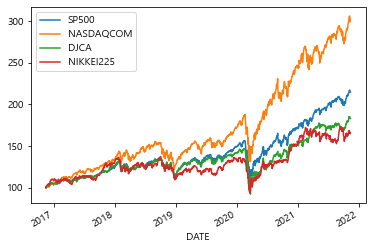

In [2]:
import pandas_datareader.data as web

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

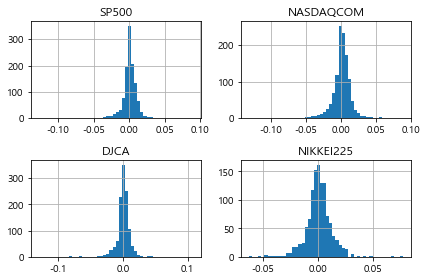

In [3]:
log_returns = np.log(data/data.shift(1))
log_returns.hist(bins=50)
plt.tight_layout()
plt.show()

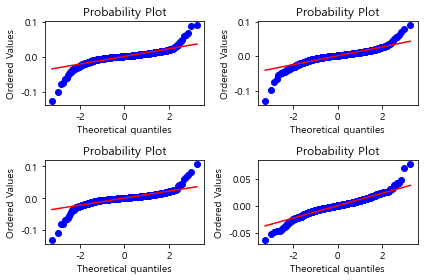

In [4]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

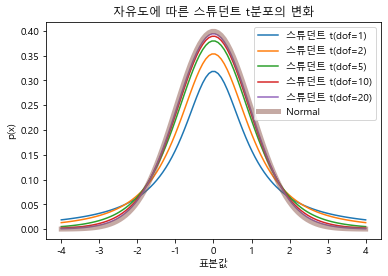

In [5]:
xx = np.linspace(-4, 4, 100)
for df in [1,2,5,10,20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=('스튜던트 t(dof=%d)' %df))
plt.plot(xx, sp.stats.norm().pdf(xx), label='Normal', lw=5, alpha=0.5)
plt.title('자유도에 따른 스튜던트 t분포의 변화')
plt.xlabel('표본값')
plt.ylabel('p(x)')
plt.legend()
plt.show()
# dof 값이 1일떄는 코시분포 > 커질수록 정규분포에 가까워짐

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


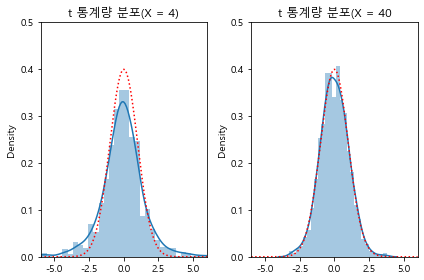

In [6]:
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1,2,1)
N = 4
x1 = rv.rvs((N,M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label='정규분포')
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title('t 통계량 분포(X = 4)')
plt.legend

plt.subplot(1,2,2)
N = 40
x2 = rv.rvs((N,M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label='정규분포')
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title('t 통계량 분포(X = 40')
plt.legend

plt.tight_layout()
plt.show()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

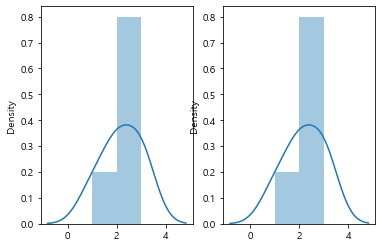

In [7]:
plt.subplot(121)
sns.distplot([1,2,3,3,2])
plt.subplot(122)
sns.distplot([1,2,3,3,2])

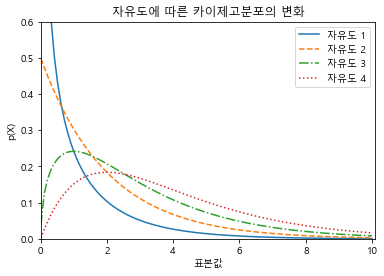

In [8]:
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ['-', '--', '-.', ':']
for df, ls, in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=('자유도 %d') %df)
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title('자유도에 따른 카이제고분포의 변화')
plt.xlabel('표본값')
plt.ylabel('p(X)')
plt.legend()
plt.show()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


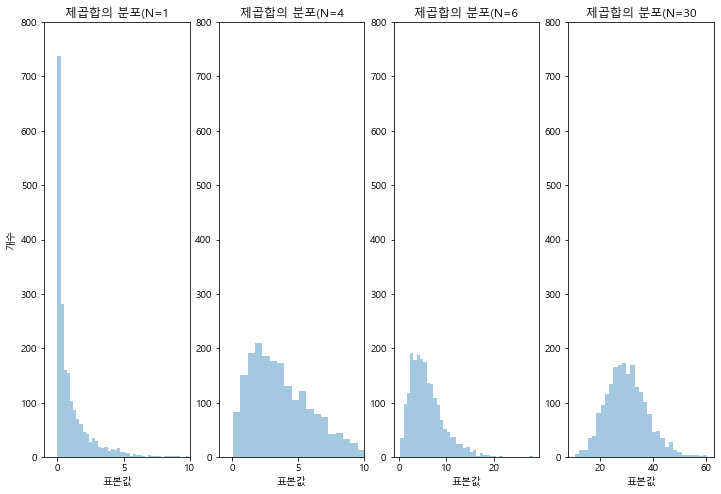

In [9]:
rv = sp.stats.norm()
M= 2000
plt.figure(figsize=(12,8))
plt.subplot(1,4,1)
N = 1
x = rv.rvs((N,M))
t = (x**2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title('제곱합의 분포(N=1')
plt.xlabel('표본값')
plt.ylabel('개수')

plt.subplot(1,4,2)
N = 4
x = rv.rvs((N,M))
t = (x**2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title(f'제곱합의 분포(N={N}')
plt.xlabel('표본값')


plt.subplot(1,4,3)
N = 6
x = rv.rvs((N,M))
t = (x**2).sum(axis=0)
sns.distplot(t, kde=False)
plt.ylim(0, 800)
plt.title(f'제곱합의 분포(N={N}')
plt.xlabel('표본값')


plt.subplot(1,4,4)
N = 30
x = rv.rvs((N,M))
t = (x**2).sum(axis=0)
sns.distplot(t, kde=False)
plt.ylim(0, 800)
plt.title(f'제곱합의 분포(N={N}')
plt.xlabel('표본값')

plt.show()
# 중심극한정리

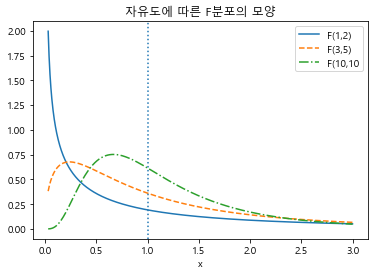

In [10]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1,2).pdf(xx), ls='-', label='F(1,2)')
plt.plot(xx, sp.stats.f(3,5).pdf(xx), ls='--', label='F(3,5)')
plt.plot(xx, sp.stats.f(10,10).pdf(xx), ls='-.', label='F(10,10')
plt.axvline(1, ls=':')
plt.xlabel('x')
plt.title('자유도에 따른 F분포의 모양')
plt.legend()
plt.show()

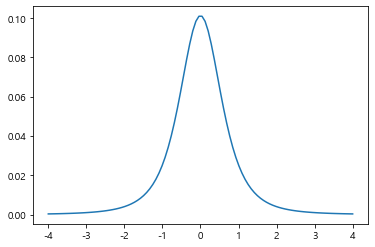

In [11]:
# t값의 제곱의 분포
xx = np.linspace(-4,4,100)
rv = sp.stats.t(df=1)
plt.plot(xx, rv.pdf(xx)**2)
plt.show()

In [12]:
def plot_t2_F(N):
    np.random.seed(0)
    t2 = sp.stats.t(df=N).rvs(1000)**2
    f = sp.stats.f(1,N).rvs(1000)
    plt.hist(t2, bins=50, range=(0,10), rwidth=0.5, align='left', color='k', label='$t^2$')
    plt.hist(f, bins=50, range=(0,10), rwidth=0.5, align='mid', color='g', label='$F$')
    plt.title(f"N={N}")
    plt.show()

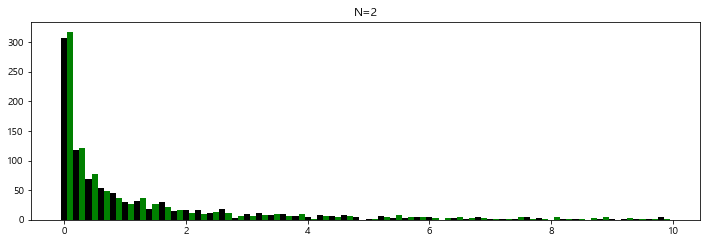

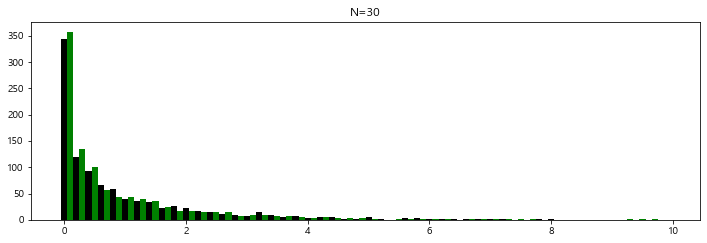

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_t2_F(2)
plt.figure(figsize=(12,8))
plt.subplot(212)
plot_t2_F(30)
plt.show()

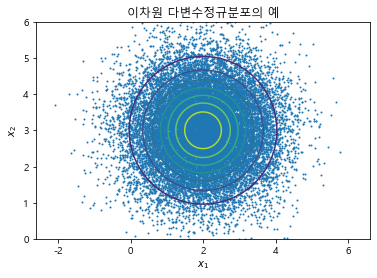

In [17]:
mu = [2,3]
cov =[[1,0],[0,1]]
rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(20000)
xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX,YY])))
plt.axis('equal')
plt.xlim(-2,6)
plt.ylim(0,6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('이차원 다변수정규분포의 예')
plt.show()
 

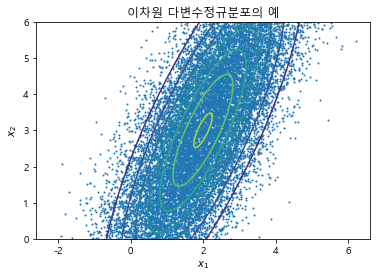

In [18]:
mu = [2,3]
cov =[[2,3],[3,7]]
rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(20000)
xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX,YY])))
plt.axis('equal')
plt.xlim(-2,6)
plt.ylim(0,6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('이차원 다변수정규분포의 예')
plt.show()

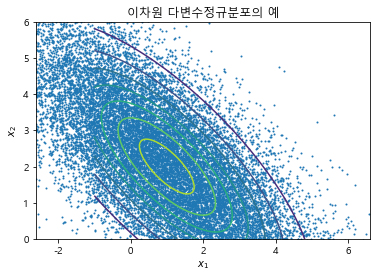

In [19]:
mu = [1,2]
cov =[[4,-3],[-3,4]]
rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(20000)
xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX,YY])))
plt.axis('equal')
plt.xlim(-2,6)
plt.ylim(0,6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('이차원 다변수정규분포의 예')
plt.show()

In [26]:
def get_set():
    flag = False
    while flag == False:
        a, b = np.random.rand(2,1)
        if a + b < 1:
            c = 1 - (a+b)
            flag = True
        else:
            continue
    return a, b, c, (a+b+c)
get_set()

(array([0.26367091]), array([0.1265433]), array([0.60978579]), array([1.]))

In [29]:
sp.stats.dirichlet((1,1,1)).rvs(1)


array([[0.34272221, 0.14804428, 0.50923351]])